<IPython.core.display.Javascript object>


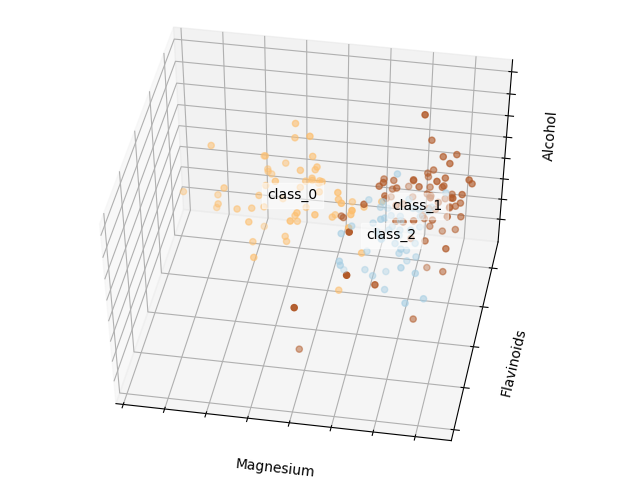

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
import seaborn

centers = [[1, 1], [-1, -1], [1, -1]]
wine = datasets.load_wine()
X = wine.data
y = wine.target

fig = plt.figure(0)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=100)

plt.cla()

pca = decomposition.PCA(n_components=3)
pca.fit_transform
pca.fit(X)
X = pca.transform(X)

for name, label in [('class_0', 0), ('class_1', 1), ('class_2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="Paired")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Magnesium')
ax.set_ylabel('Flavinoids')
ax.set_zlabel('Alcohol')

plt.show()

<IPython.core.display.Javascript object>


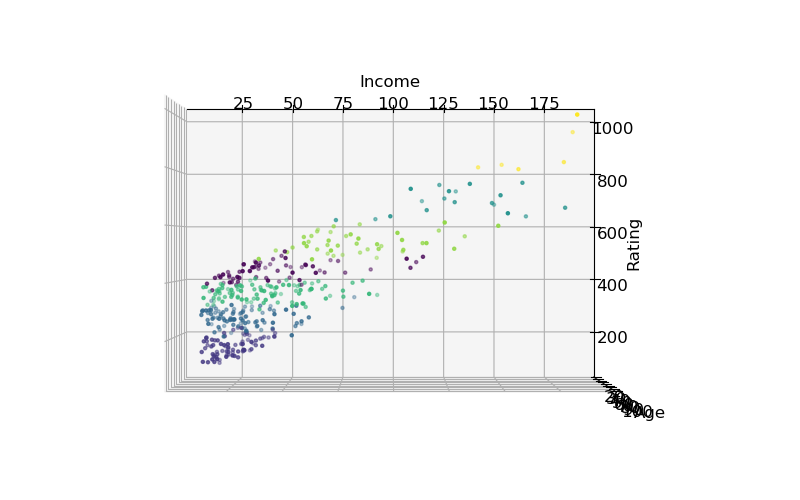

In [23]:
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8.0, 5.0)

X = pd.read_csv('../data/Credit.csv')
X = X.drop(["Unnamed: 0", "Gender", "Student", "Married", "Ethnicity"], axis = 1)
X.head()

#K-means with N clusters
N = 7
from sklearn.cluster import KMeans
km = KMeans(n_clusters=N, random_state=1)
km.fit(X)

# review the cluster labels
set(km.labels_)

X['cluster'] = km.predict(X)
X.cluster.value_counts()

fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=90, azim=270)

plt.cla()

ax.scatter(X['Income'], X['Rating'], X['Age'], c=X.cluster, s=5)

ax.set_xlabel('Income')
ax.set_ylabel('Rating')
ax.set_zlabel('Age')
plt.show()

# Scores are grouped in bands and by the increment of 100 until it reaches 600.

<IPython.core.display.Javascript object>


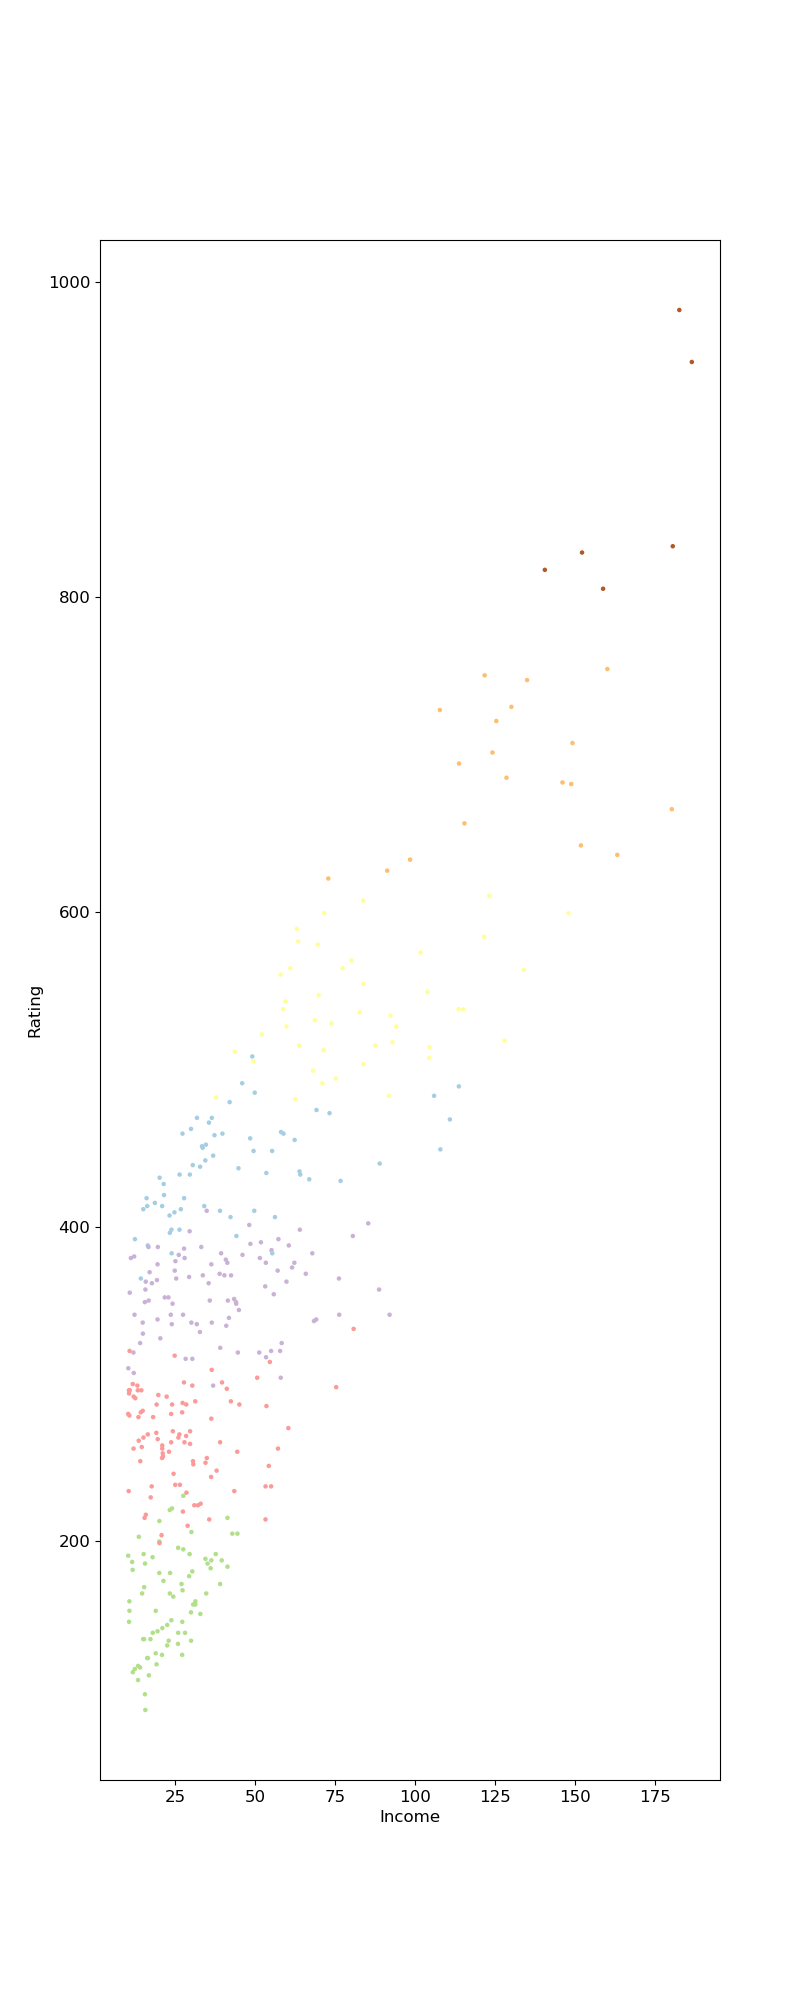

In [14]:
plt.rcParams['figure.figsize'] = (8.0, 20.0)

fig = plt.figure()
plt.scatter(X.Income, X.Rating, c=X.cluster, s=5, cmap='Paired')

plt.xlabel('Income')
plt.ylabel('Rating')
plt.show()

# Expanded 2D view

In [ ]:
XX = X.copy()
XX['Income'] = (X.Income - X.Income.mean())/X.Income.std()
XX['Rating'] = (X.Rating - X.Rating.mean())/X.Rating.std()
XX['Age'] = (X.Age - X.Age.mean())/X.Age.std()

km = KMeans(n_clusters=N, random_state=1)
XX['cluster'] = km.fit_predict(XX[['Age', 'Rating', 'Income']])

fig = plt.figure()
plt.scatter(XX.Age, XX.Income, c=XX.cluster, s=5, cmap='Paired')

plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

<IPython.core.display.Javascript object>


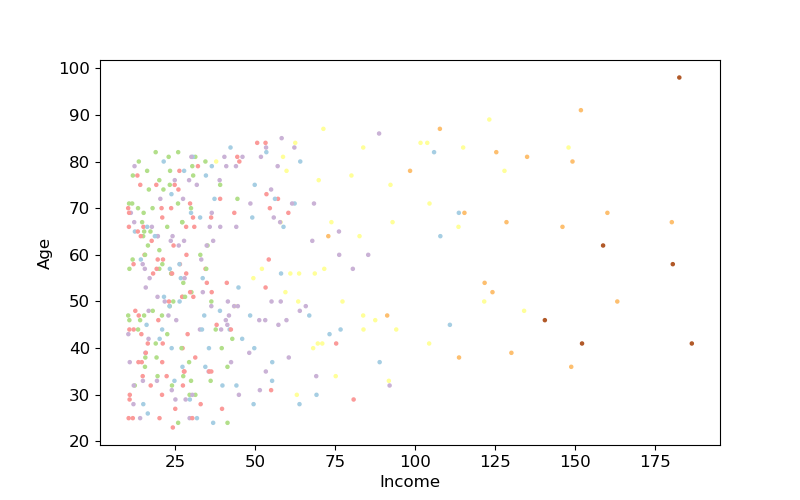

In [15]:
plt.rcParams['figure.figsize'] = (8.0, 5.0)

fig = plt.figure()
plt.scatter(X.Income, X.Age, c=X.cluster, s=5, cmap='Paired')

plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

# Age and Income, not so much related among the credit data population

<IPython.core.display.Javascript object>


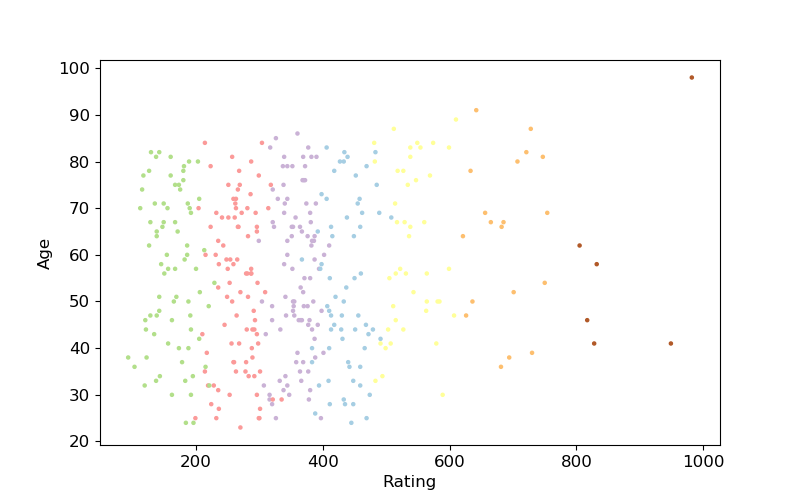

In [16]:
fig = plt.figure()
plt.scatter(X.Rating, X.Age, c=X.cluster, s=5, cmap='Paired')

plt.xlabel('Rating')
plt.ylabel('Age')
plt.show()

# The same goes for Rating and Income
# What's more interesting in this plot is that there are hollow areas between the color bands

<IPython.core.display.Javascript object>


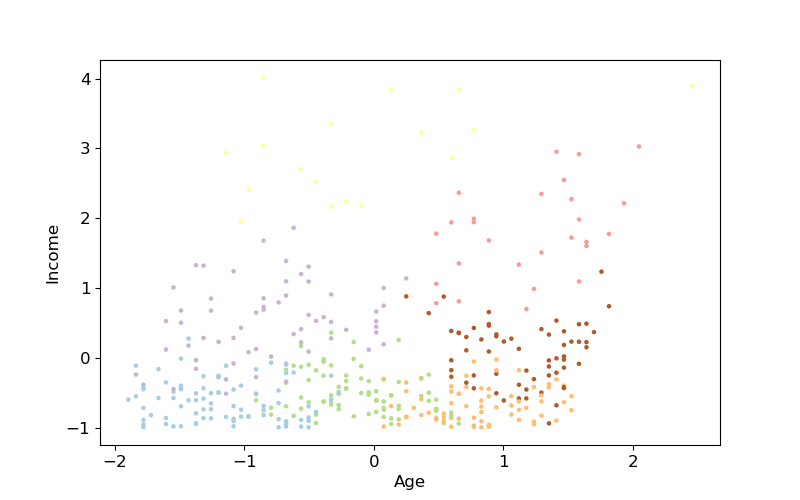

In [17]:
XX = X.copy()
XX['Income'] = (X.Income - X.Income.mean())/X.Income.std()
XX['Rating'] = (X.Rating - X.Rating.mean())/X.Rating.std()
XX['Age'] = (X.Age - X.Age.mean())/X.Age.std()

km = KMeans(n_clusters=N, random_state=1)
XX['cluster'] = km.fit_predict(XX[['Age', 'Rating', 'Income']])

fig = plt.figure()
plt.scatter(XX.Age, XX.Income, c=XX.cluster, s=5, cmap='Paired')

plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

<IPython.core.display.Javascript object>


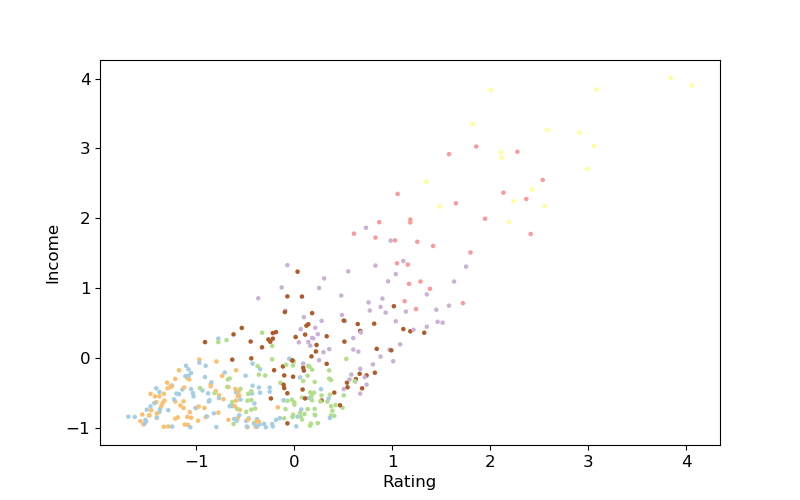

In [20]:
XX = X.copy()
XX['Income'] = (X.Income - X.Income.mean())/X.Income.std()
XX['Rating'] = (X.Rating - X.Rating.mean())/X.Rating.std()
XX['Age'] = (X.Age - X.Age.mean())/X.Age.std()

km = KMeans(n_clusters=N, random_state=1)
XX['cluster'] = km.fit_predict(XX[['Age', 'Rating', 'Income']])

fig = plt.figure()
plt.scatter(XX.Rating, XX.Income, c=XX.cluster, s=5, cmap='Paired')

plt.xlabel('Rating')
plt.ylabel('Income')
plt.show()

<IPython.core.display.Javascript object>


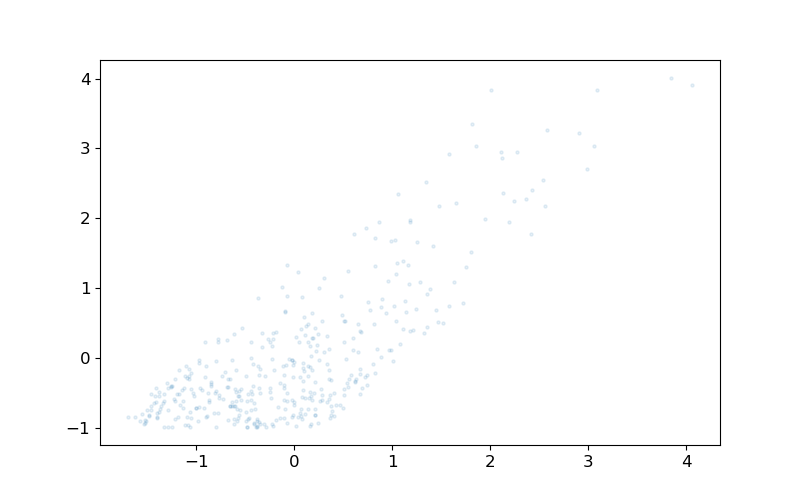

In [19]:
fig = plt.figure()
plt.scatter(XX.Rating, XX.Income, alpha=.1, s=5, )

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.12)
XX.cluster = dbscan.fit_predict(XX[['Income','Rating', 'Age']])
XX.cluster.value_counts()

<IPython.core.display.Javascript object>


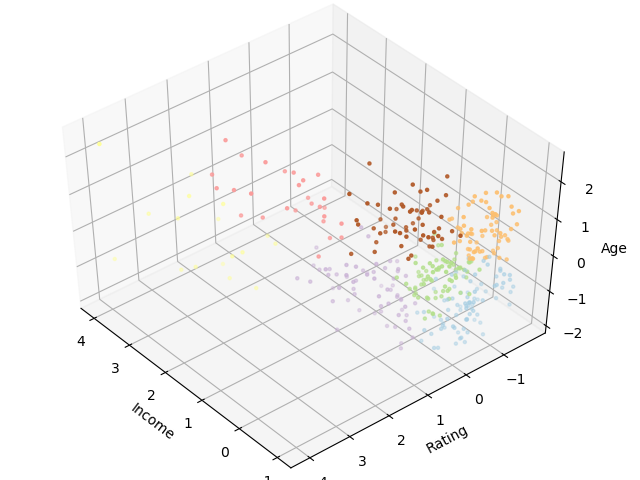

In [9]:
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=140)

plt.cla()

ax.scatter(XX['Income'], XX['Rating'], XX['Age'], c=XX.cluster, s=5, cmap='Paired')

ax.set_xlabel('Income')
ax.set_ylabel('Rating')
ax.set_zlabel('Age')
plt.show()

<IPython.core.display.Javascript object>


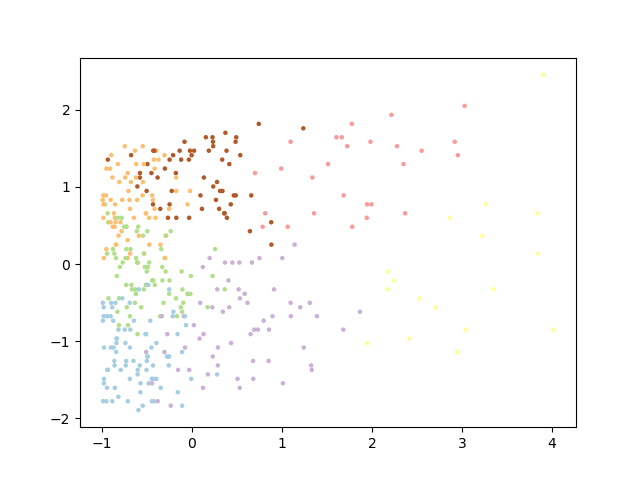

In [10]:
fig = plt.figure()
plt.scatter(XX.Income, XX.Age, s=5, c=XX.cluster, cmap='Paired')

In [24]:
# calculate SC for K=7
from sklearn import metrics
metrics.silhouette_score(XX[['Income', 'Rating', 'Age']], X.cluster)

0.0736170561074945

In [25]:
metrics.silhouette_score(XX[['Income', 'Rating', 'Age']], XX.cluster)

0.3183053475041708

In [30]:
from tqdm import tqdm

# calculate SC for K=2 through K=19
k_range = range(2, 40)
scores = []
for k in tqdm(k_range):
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(XX[['Income', 'Rating', 'Age']])
    scores.append(metrics.silhouette_score(XX[['Income', 'Rating', 'Age']], labels))

100%|██████████| 38/38 [00:03<00:00,  6.42it/s]


<IPython.core.display.Javascript object>


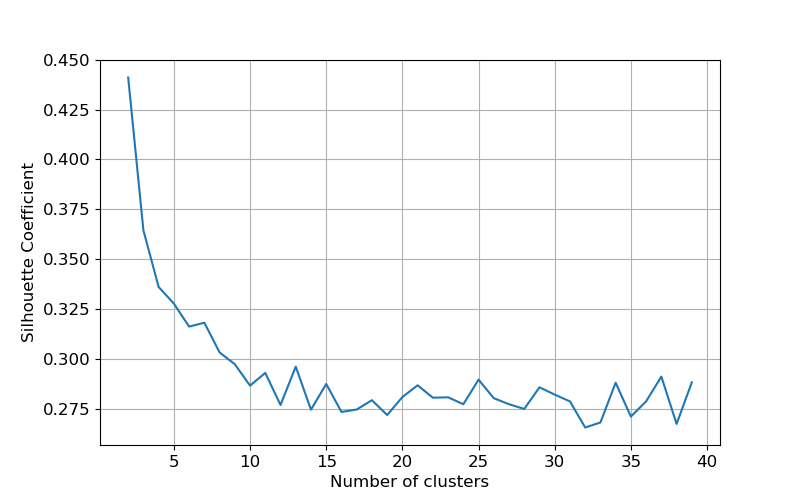

In [31]:
# plot the results
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()